In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

In [2]:
from connection import *

con = connect()

Connection Successful


Distribution

In [3]:
query = "progression.sql"
data = SQL(query, con)

In [4]:
#data.to_csv("data/progression_order.csv")

In [5]:
data

,domain_id,root_id,task_type_id,task_level,progression_order,time_implemented
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
1170,14,6,6,5,25,2019-10-08
1171,14,29,174,6,26,2019-10-08
1172,14,7,169,6,27,2019-10-08
1173,14,28,173,6,28,2019-10-08


In [6]:
dates = sorted(pd.unique(data["time_implemented"]))
dates

[numpy.datetime64('2012-01-01T00:00:00.000000000'),
 numpy.datetime64('2017-03-20T00:00:00.000000000'),
 numpy.datetime64('2017-04-04T00:00:00.000000000'),
 numpy.datetime64('2017-12-04T00:00:00.000000000'),
 numpy.datetime64('2019-10-08T00:00:00.000000000')]

In [7]:
df = pd.read_csv("data/context_action.csv")
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
3,695385,15666,20,1,5,0.800,1,1y,1964,3,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"


In [8]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [9]:
disorder_ids = df.groupby("patient_id")["disorder_id"].apply(set).reset_index()
disorder_ids

,patient_id,disorder_id
0,14189,{3}
1,14561,{2}
2,14683,"{2, 3}"
3,14685,{2}
4,14696,{2}
...,...,...
97749,415551,{9}
97750,415603,{2}
97751,415758,{2}
97752,415867,{1}


In [10]:
df = df.drop(columns="disorder_id")
df = df.merge(disorder_ids, on="patient_id", how="left")
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860707,19565141,324494,173,6,1,1.000,14,10y,1947,2019-08-26,2019-08-26 14:17:41,NaN,NaN,{6},{9}
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [11]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
df = df.dropna()
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860704,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [13]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
df.dtypes

id                        int64
patient_id                int64
task_type_id              int64
task_level                int64
completed_task_count      int64
accuracy                float64
domain_id                 int64
condition_since          object
birth_year                int64
start_time               object
start_time_min           object
end_time                 object
end_time_min             object
deficit_id               object
disorder_id              object
dtype: object

In [15]:
data.dtypes

domain_id                     int64
root_id                       int64
task_type_id                  int64
task_level                    int64
progression_order             int64
time_implemented     datetime64[ns]
dtype: object

In [16]:
df["end_time"] = pd.to_datetime(df["end_time"])

In [17]:
data.rename(columns={'time_implemented':'end_time'}, inplace=True)


In [18]:
v1_progression = data[data.end_time < pd.to_datetime(dates[1])]
v1_progression

,domain_id,root_id,task_type_id,task_level,progression_order,end_time
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
256,14,8,8,5,25,2012-01-01
257,14,29,29,5,26,2012-01-01
258,14,7,7,5,27,2012-01-01
259,14,28,28,5,28,2012-01-01


In [19]:
v1_df = df[df.end_time < pd.to_datetime(dates[1])]
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61856072,6343016,108029,28,4,2,1.000,14,6m,1970,2017-03-13,2017-03-13 18:57:50,2017-03-13,2017-03-13 18:58:31,{3},{1}
61856081,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}
61856082,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}
61856083,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}


In [20]:
pd.unique(v1_df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [21]:
v1_df = v1_df.merge(v1_progression, left_on=["task_type_id", "task_level", "domain_id"], right_on=["task_type_id", "task_level", "domain_id"])
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746885,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746886,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746887,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01
18746888,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01


In [22]:
len(pd.unique(v1_df["patient_id"]))

20308

In [23]:
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746885,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746886,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746887,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01
18746888,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01


In [24]:
d = v1_df[v1_df.domain_id == 14]
d = d.drop_duplicates(subset="id")

In [25]:
temp = d.loc[d.groupby("patient_id")["progression_order"].idxmin()]

In [ ]:
temp = d.loc[d.groupby("patient_id")["progression_order"].idxmax()]

In [ ]:
temp = d

<Axes: xlabel='progression_order', ylabel='Count'>

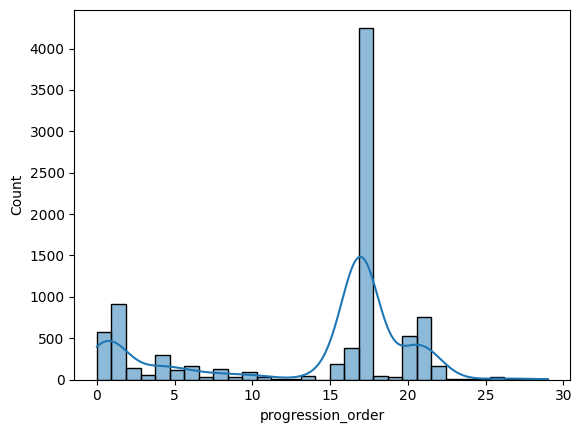

In [26]:
sns.histplot(data=temp, x="progression_order", kde=True)

Older Methods

In [ ]:
p = df[df["patient_id"] == 45118]
p = p.drop_duplicates(subset="id")
p

In [ ]:
p.nunique()

In [ ]:
progression = SQL("select * from constant_therapy.task_progression where time_implemented = '2012-01-01 00:00:00';", con)
progression

In [ ]:
p = p.merge(progression, how="left")
p

In [ ]:
p = p.loc[p.groupby("domain_id")["progression_order"].idxmin()]

In [ ]:
p[["domain_id", "progression_order"]]

In [ ]:
sns.barplot(data=p[["domain_id", "progression_order"]], x="domain_id", y="progression_order", )

In [ ]:
sns.barplot(data=p[["domain_id", "progression_order"]], x="domain_id", y="progression_order", )

In [ ]:
disorder3 = df[df["disorder_id"] == 3]
disorder9 = df[df["disorder_id"] == 9]

In [ ]:
df.dtypes

In [ ]:
df = df.sort_values(by="start_time_min")

In [ ]:
df["patient_id"]

In [ ]:
p1 = df[df["patient_id"] == 14189]

In [ ]:
p1.groupby("task_type_id").size().plot.pie()

In [ ]:
t1 = p1[p1["task_type_id"] == 37]

In [ ]:
t1 = t1.drop_duplicates(subset="id")

In [ ]:
t1

In [ ]:
sns.lineplot(data=t1, x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=t1, x="start_time", y="task_level")

In [ ]:
patient_groupby = df.drop_duplicates(subset="id").groupby("patient_id")
patient_groupby.head()

In [ ]:
disorder3_groupby = disorder3.drop_duplicates(subset="id").groupby("patient_id")
disorder3_groupby.head()

In [ ]:
disorder3_groupby.groups.keys()

In [ ]:
p = disorder3[disorder3["patient_id"] == 14683]
p

In [ ]:
pd.unique(p["task_type_id"])

In [ ]:
p[p["task_type_id"] == 20]

In [ ]:
sns.lineplot(data=p[p["task_type_id"] == 20], x="start_time", y="task_level")

In [ ]:
sns.lineplot(data=p[p["task_type_id"] == 30], x="start_time", y="task_level")

In [ ]:
d = p[p["task_type_id"] == 30]
sns.lineplot(data=d[d["task_level"] == 2], x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 4], x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 5], x="start_time", y="accuracy")

In [ ]:
d = p[p["task_type_id"] == 27]

In [ ]:
sns.lineplot(data=d, x="start_time", y="task_level")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 3], x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 4], x="start_time", y="accuracy")

In [ ]:
disorder9_groupby = disorder9.drop_duplicates(subset="id").groupby("patient_id")
disorder9_groupby.head()

In [ ]:
disorder9_groupby.groups.keys()

In [ ]:
disorder9 = disorder9.drop_duplicates(subset="id")
p = disorder9[disorder9["patient_id"] == 90772]
p

In [ ]:
pd.unique(p["task_type_id"])

In [ ]:
d = p[p["task_type_id"] == 27]
d

In [ ]:
sns.lineplot(data=d, x="start_time", y="task_level")

In [ ]:
d = p[p["task_type_id"] == 73]
d

In [ ]:
sns.lineplot(data=d, x="start_time", y="task_level")